In [1]:
%matplotlib inline

# 592B, Class 4.1 (09/24).  Aliasing and the Sampling theorem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
import scipy.signal as signal
import librosa #new!

from ipywidgets import interactive
from IPython.display import Audio, display

## Aliasing

Consider the following function:

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$

***In class-exercise: What is the (fundamental) frequency of $f(t)$?***

Text(0.5, 1.0, '1000 Hz sampling rate')

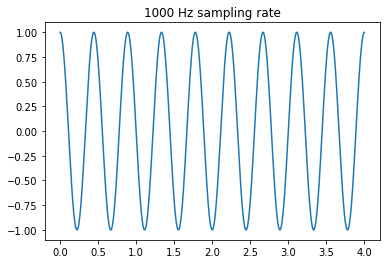

In [3]:
fs = 1000 # Sampling rate of 1000 Hz
t_start = 0; t_stop = 4
ns = int((t_stop - t_start) * fs + 1)
x = np.linspace(0,4,ns)
y = np.cos(9*np.pi/2*x)

plt.figure("1000 Hz sampling rate")
plt.plot(x,y)
plt.title("1000 Hz sampling rate")


***In-class exercise: resampling at different rates***

Now let's try sampling this signal at some different sampling rates:

1. 100 Hz
2. 10 Hz
3. 1 Hz

Here's some sample code for doing 100 Hz. You could of course write a function that takes the desired sampling rate as an argument. Try all three sampling rates, and feel free to try some other as well.

In [4]:

ns_100 = int((t_stop - t_start) * 100 + 1)
x_100 = np.linspace(0,4,ns_100)
y_100 = np.cos(9*np.pi/2*x_100)



OK, so let's do some plotting to see what our samples are recovering from the original signal. Here's some sample code for plotting for 100 Hz sampling rate. ***Plot for your other sampling rates, too.***

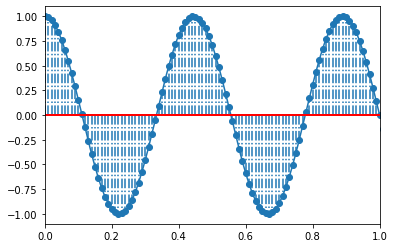

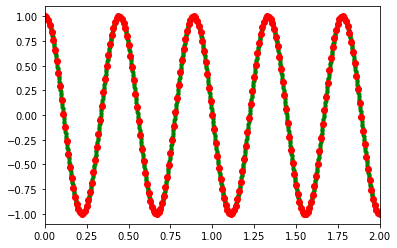

In [5]:
plt.figure("100 Hz sampling rate, stem plot")
plt.xlim(0,1)
plt.plot(x,y)
markerline, stemlines, baseline = plt.stem(x_100,y_100, '-.', use_line_collection = True)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)


plt.figure("100 Hz sampling rate, dots")
plt.xlim(0,2)
plt.plot(x,y, 'g.', x_100, y_100, 'ro')


Wow, we sure are missing a lot of data--could we still recover the original signal $y(t)$?

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$


***In-class exercise: can you think of a function $z(t)$ that has the same values as our $y(t)$ at the sampled timepoints when we sample with a rate of 1Hz? If so, plot it together with the original signal and the 1 Hz sampling points.*** 

To do this, you could change
```
plt.plot(x,y)
```
to something like this, where `z` is your definition of $z(t)$ and `x2` is a vector of the sampled time points for 1 Hz sampling rate:

```
plt.plot(x,y, 'g.', x2, z, 'ro-')
```

NameError: name 'x_1' is not defined

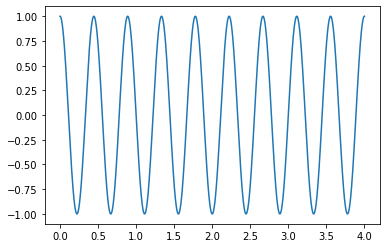

In [6]:
plt.figure("1 Hz sampling rate, aliasing")
plt.plot(x,y) # change this to add in plot of z(t)
markerline, stemlines, baseline = plt.stem(x_1,y_1, '-.', use_line_collection = True)

***In-class exercise: suppose you sample at a sampling rate of 4.5 Hz. Overlay the stem plot with the original signal for this sampling rate (like the previous plots).***


## The sampling theorem

The minimal sampling rate that can be used to reconstruct a signal from its samples is two times the frequency of the highest frequency component $\nu_{max}$ in the signal:

   sampling rate $> 2\nu_{max}$

The frequency 2$\nu_{max}$ is often called the **Nyquist frequency**.

***In-class exercise: What is the Nyquist frequency for $y(t)$ below?***

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$


So for a complex wave (a sum of sinusoids), increasing the frequency of the highest frequency component $\nu_{max}$ drives up the required sampling rate for reconstruction. Sometimes there is no highest frequency, e.g., in an infinite series like for a square wave.

Here's a intuitive example to play with. Plot a signal composed of a low frequency sinusoid and a high frequency sinusoid. As the gap in frequencies between the two frequency components increases, the resulting complex wave looks closer and closer to the lower frequency component, with lots of squigglies up and down at the frequency of the higher frequency component.


In [7]:
def plot_play_summed_sines(f1 = 440, f2 = 880, t_start = 0, t_stop = 2, fs = 44100, xlim_max = 0.01):
    x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
    y1 = np.sin(2*np.pi*f1*x)
    y2 = np.sin(2*np.pi*f2*x)
    
    plt.xlim(t_start,xlim_max)
    plt.plot(x , y1, "-g", label="y1") 
    plt.plot(x , y2, "-b", label="y2") 
    plt.plot(x , y1 + y2, "-r", label="y1+y2") 
    plt.legend(loc="upper right") 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    plt.title("Adding up sines") 
    
    display(Audio(data=y1, rate=fs))
    display(Audio(data=y2, rate=fs))
    display(Audio(data=y1+y2, rate=fs))
    
v = interactive(plot_play_summed_sines, f1=(50,200), f2=(1000,5000), t_start = (0,0), t_stop = (0,5), xlim_max = (0.01,0.1))
display(v)    

interactive(children=(IntSlider(value=200, description='f1', max=200, min=50), IntSlider(value=1000, descripti…

If we **undersample**, we get **aliasing**: two functions may be indistinguishable based on our sampling, and we may recover a lower frequency alias of the actual signal. We can also have [visual aliasing](http://danielwalsh.tumblr.com/post/54400376441/playing-detective-with-rolling-shutter-photos).